# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
%pip install beautifulsoup4

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
from IPython.display import HTML

# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
# from urllib.request import urlopen
# import random
# import re
# import scrapy

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [3]:
#your code

url = 'https://github.com/trending/developers'

html = req.get(url).text

sopa = bs(html, 'html.parser') # parseo la sopa, para transformarlo a algo similiar al htlm(etiquetas y demás)


In [4]:
name = sopa.find_all("h1", class_ = "h3 lh-condensed") # la class sea h3 lh-condesed

lista = [] # Creo una lista vacia para meter los nombres

for i in name:
    lista.append(i.text.strip())

lista


['Clement Tsang',
 'Mattias Wadman',
 'Henrik Rydgård',
 'Jose Diaz-Gonzalez',
 'Andrei',
 'sinclairzx81',
 'boojack',
 'lllyasviel',
 'Martin von Zweigbergk',
 'Ismail Pelaseyed',
 'Jerry Liu',
 'C. T. Lin',
 'oobabooga',
 'Lee Robinson',
 'Emil Ernerfeldt',
 'jdx',
 'Earle F. Philhower, III',
 'Casey Rodarmor',
 'Yagiz Nizipli',
 'Patrick von Platen',
 'xiaoyifang',
 'DaniPopes',
 'Mehdi Hadeli',
 'Michael Davis',
 'Lexi Mattick']

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [5]:
#your code

alias = sopa.find_all ("a", class_= "Link--secondary Link" )
for i in alias:
    print(i.text.strip())

ClementTsang
wader
hrydgard
josegonzalez
abetlen
martinvonz
homanp
jerryjliu
chentsulin
leerob
emilk
earlephilhower
casey
anonrig
patrickvonplaten
mehdihadeli
the-mikedavis
kognise


#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [6]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

html = req.get(url).content # puedo obtener un text o content

sopa = bs(html, "html.parser") # parseo la sopa, para ver algo similiar a un html

repositorios = sopa.find_all("h2" , class_ = "h3 lh-condensed") # etiqueta h2, con nombre h3 ...

for repositorios in repositorios:
    print(repositorios.text.strip().replace("/n" , " "))

facebookresearch /

      codellama
nlpxucan /

      WizardLM
Pythagora-io /

      gpt-pilot
neulab /

      prompt2model
Z4nzu /

      hackingtool
Plachtaa /

      VALL-E-X
facebookresearch /

      llama
firmai /

      financial-machine-learning
public-apis /

      public-apis
oobabooga /

      text-generation-webui
geekan /

      MetaGPT
blakeblackshear /

      frigate
AUTOMATIC1111 /

      stable-diffusion-webui
Stability-AI /

      stablediffusion
kovidgoyal /

      calibre
continuedev /

      continue
elebumm /

      RedditVideoMakerBot
paperless-ngx /

      paperless-ngx
paul-gauthier /

      aider
RadeonOpenCompute /

      ROCm
satwikkansal /

      wtfpython
w-okada /

      voice-changer
dgtlmoon /

      changedetection.io
Zulko /

      moviepy
facebookresearch /

      audiocraft


#### Display all the image links from Walt Disney wikipedia page

In [7]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

html = req.get(url).content 

sopa = bs(html, 'html.parser') # parseo la sopa, para ver algo similiar a un html


link = []
sopa.find_all('img') # Formato ig 

links_image = [i['src']for i in sopa.find_all('img')]

for link in links_image:
    print(link)

/static/images/icons/wikipedia.png
/static/images/mobile/copyright/wikipedia-wordmark-en.svg
/static/images/mobile/copyright/wikipedia-tagline-en.svg
//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png
//upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG
//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg
//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/220px-Steamboat-willie.jpg
//upload.wiki

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [20]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 
html = req.get(url).content

sopa = bs(html ,"html.parser") #Cocino la sopita

In [21]:
etiqueta = sopa.find_all("a") #busco todas las etiquetas con a
etiqueta[1].attrs["href"] # accedo a la segunda etiqueta de mi lista de etiquetas 
#recordar cajas etiquetas de Yona, 

'/wiki/Main_Page'

In [26]:
links = [etiqueta[i].attrs["href"] for i in range(len(etiqueta))]
links

['#bodyContent',
 '/wiki/Main_Page',
 '/wiki/Wikipedia:Contents',
 '/wiki/Portal:Current_events',
 '/wiki/Special:Random',
 '/wiki/Wikipedia:About',
 '//en.wikipedia.org/wiki/Wikipedia:Contact_us',
 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 '/wiki/Help:Contents',
 '/wiki/Help:Introduction',
 '/wiki/Wikipedia:Community_portal',
 '/wiki/Special:RecentChanges',
 '/wiki/Wikipedia:File_upload_wizard',
 '/wiki/Main_Page',
 '/wiki/Special:Search',
 '/w/index.php?title=Special:CreateAccount&returnto=Python',
 '/w/index.php?title=Special:UserLogin&returnto=Python',
 '/w/index.php?title=Special:CreateAccount&returnto=Python',
 '/w/index.php?title=Special:UserLogin&returnto=Python',
 '/wiki/Help:Introduction',
 '/wiki/Special:MyContributions',
 '/wiki/Special:MyTalk',
 '#',
 '#Snakes',
 '#Computing',
 '#People',
 '#Roller_coasters',
 '#Vehicles',
 '#Weaponry',
 '#Other_uses',
 '#See_also',
 

#### Number of Titles that have changed in the United States Code since its last release point 

In [27]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [32]:
#your code 
html = req.get(url).content # Extraemos el html lo podemos dejar con content o text
html[:500] # para solo ver los 500 caracteres 
sopa = bs(html, "html.parser") # Cocino la sopita para ver algo semejante a html


In [44]:
etiqueta = sopa.find_all('div', class_='usctitle')
lista = []

for i in etiqueta:
    lista.append(i.text.strip())

lista



['All titles in the format selected compressed into a zip archive.',
 '',
 'Title 1 - General Provisions ٭',
 'Title 2 - The Congress',
 'Title 3 - The President ٭',
 'Title 4 - Flag and Seal, Seat of Government, and the States ٭',
 'Title 5 - Government Organization and Employees ٭',
 'Title 6 - Domestic Security',
 'Title 7 - Agriculture',
 'Title 8 - Aliens and Nationality',
 'Title 9 - Arbitration ٭',
 'Title 10 - Armed Forces ٭',
 'Title 11 - Bankruptcy ٭',
 'Title 12 - Banks and Banking',
 'Title 13 - Census ٭',
 'Title 14 - Coast Guard ٭',
 'Title 15 - Commerce and Trade',
 'Title 16 - Conservation',
 'Title 17 - Copyrights ٭',
 'Title 18 - Crimes and Criminal Procedure ٭',
 'Title 20 - Education',
 'Title 21 - Food and Drugs',
 'Title 22 - Foreign Relations and Intercourse',
 'Title 23 - Highways ٭',
 'Title 24 - Hospitals and Asylums',
 'Title 25 - Indians',
 'Title 26 - Internal Revenue Code',
 'Title 27 - Intoxicating Liquors',
 'Title 28 - Judiciary and Judicial Procedure ٭

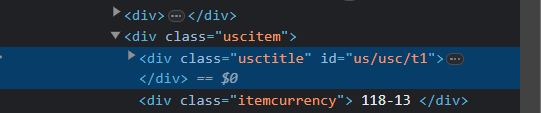 
<h6>El inspeccionar de mi url, ver la class "uscitem" que es la que contiene los enlances<h6>

#### A Python list with the top ten FBI's Most Wanted names 

In [45]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten' 

In [47]:
html = req.get(url).text
sopa = bs(html , "html.parser")


In [56]:
escoria = []

lista = sopa.find_all("h3")

for i in lista:
    escoria.append(i.text.strip())
    
escoria


['RUJA IGNATOVA',
 'DONALD EUGENE FIELDS II',
 'ALEXIS FLORES',
 'ARNOLDO JIMENEZ',
 'OMAR ALEXANDER CARDENAS',
 'YULAN ADONAY ARCHAGA CARIAS',
 'BHADRESHKUMAR CHETANBHAI PATEL',
 'WILVER VILLEGAS-PALOMINO',
 'ALEJANDRO ROSALES CASTILLO',
 'JOSE RODOLFO VILLARREAL-HERNANDEZ',
 'federal bureau of investigation',
 'FBI.gov Contact Center']

![Captura de pantalla 2023-08-28 204848.png](<attachment:Captura de pantalla 2023-08-28 204848.png>)
<h6>selecciono el nombre y busco el la etiqueta h3 <h6>
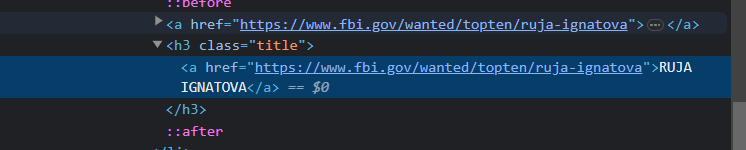

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [ ]:
#your code

#### Display the date, days, title, city, country of next 25 hackathon events as a Pandas dataframe table

In [ ]:
# This is the url you will scrape in this exercise
url ='https://hackevents.co/hackathons'

In [ ]:
#your code

#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [64]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'


In [75]:
html = req.get(url).content
sopa = bs(html,"html.parser")


languaje = []

strong_tags = sopa.find_all("strong")

for i in strong_tags:
    languaje.append(i.text.strip())


languaje.pop #pop elimina el ultimo elemento de la lista

languaje


['The Free Encyclopedia',
 'English',
 '日本語',
 'Español',
 'Русский',
 'Deutsch',
 'Français',
 'Italiano',
 '中文',
 'Português',
 'فارسی',
 'Download Wikipedia for Android or iOS']

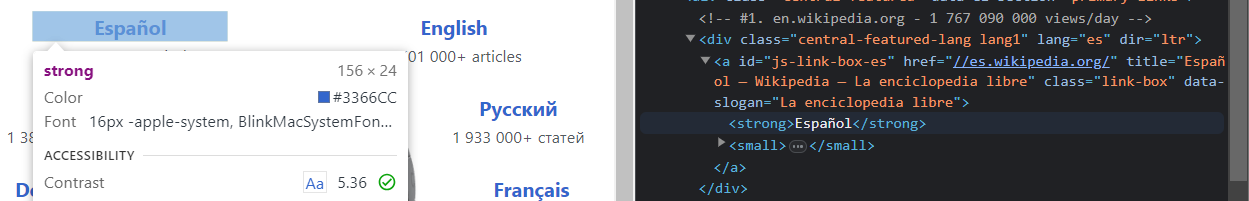 
<h6>busco todas las etiquetas stron<h6>

#### A list with the different kind of datasets available in data.gov.uk 

In [77]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [78]:
#your code 
html = req.get(url).text

sopa = bs(html,"html.parser")

etiqueta = sopa.find_all("h3")

dataset = []

for i in etiqueta:
    dataset.append(i.text.strip())  #Con strip elimino cualquier espacio inicial y final 

dataset



['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [108]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [109]:
#your code
html = req.get(url).content
sopa = bs(html, "html.parser")

In [116]:
filas = sopa.find_all("td")
filas = [row.text.strip().split("\n") for row in filas ]# \n parto por el salto de línea
filas

[['Mandarin Chinese(incl. Standard Chinese, but excl. other varieties)'],
 ['939'],
 ['Sino-Tibetan'],
 ['Sinitic'],
 ['Spanish'],
 ['485'],
 ['Indo-European'],
 ['Romance'],
 ['English'],
 ['380'],
 ['Indo-European'],
 ['Germanic'],
 ['Hindi(excl. Urdu, and other languages)'],
 ['345'],
 ['Indo-European'],
 ['Indo-Aryan'],
 ['Portuguese'],
 ['236'],
 ['Indo-European'],
 ['Romance'],
 ['Bengali'],
 ['234'],
 ['Indo-European'],
 ['Indo-Aryan'],
 ['Russian'],
 ['147'],
 ['Indo-European'],
 ['Balto-Slavic'],
 ['Japanese'],
 ['123'],
 ['Japonic'],
 ['Japanese'],
 ['Yue Chinese(incl. Cantonese)'],
 ['86.1'],
 ['Sino-Tibetan'],
 ['Sinitic'],
 ['Vietnamese'],
 ['85.0'],
 ['Austroasiatic'],
 ['Vietic'],
 ['Turkish'],
 ['84.0'],
 ['Turkic'],
 ['Oghuz'],
 ['Wu Chinese(incl. Shanghainese)'],
 ['83.4'],
 ['Sino-Tibetan'],
 ['Sinitic'],
 ['Marathi'],
 ['83.2'],
 ['Indo-European'],
 ['Indo-Aryan'],
 ['Telugu'],
 ['83.0'],
 ['Dravidian'],
 ['South-Central'],
 ['Korean'],
 ['81.7'],
 ['Koreanic'],
 ['

In [119]:
columnas = filas[0]
data = filas

df =pd.DataFrame(data, columns = columnas)
df.head(10)

ValueError: 1 columns passed, passed data had 46 columns

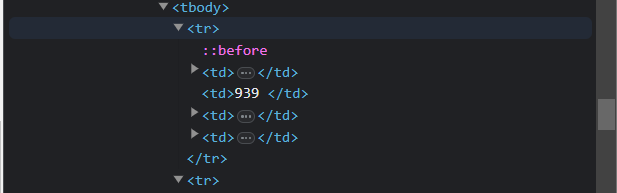
<h6>Busco en la etiqueta madre <h6>

In [133]:
## CHATI 

from bs4 import BeautifulSoup

# Supongamos que tienes el contenido HTML en una variable llamada "html_content"
soup = BeautifulSoup(html, 'html.parser')

# Buscar todas las etiquetas <td> en el contenido HTML
td_tags = soup.find_all('td')

# Crear una lista para almacenar las etiquetas <td> con números
td_with_numbers = []

# Iterar sobre las etiquetas <td> y seleccionar las que contengan números
for tag in td_tags:
    text = tag.text.strip()  # Obtener el texto de la etiqueta y eliminar los espacios en blanco
    if any(char.isdigit() for char in text):  # Verificar si el texto contiene algún dígito
        td_with_numbers.append(tag)  # Agregar la etiqueta a la lista

# Imprimir las etiquetas <td> con números
df = pd.DataFrame({'td_with_numbers': td_with_numbers})

df.head(3)

,td_with_numbers
0,[939\n]
1,[485\n]
2,[380\n]


### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [120]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [121]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [122]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [123]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [124]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [125]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [126]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [127]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [128]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [129]:
#your code